<a href="https://colab.research.google.com/github/g0m3zc/Hotel_booking_demand/blob/main/Hotel_Booking_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Cancelations

# Introduction and Sources

###Introduction

Context:  
Cancelations are an important aspect to any sales process.  In this project we will review canceled reservations for hotels in Portugal in efforts to better understand trends and areas for opportunity.


Objective:  
Analyze trends in features related to hotel reservation cancelations.  Create a classification model that is able to determine which reservations are more likely to cancel.

Dataset downloaded from: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/code

Dataset originated from Science Direct article "Hotel Booking Demand Datasets"
: https://doi.org/10.1016/j.dib.2018.11.126


## Data Dictionary


| Feature | Description |
| ----------- | ----------- |
| adr | Average Daily Rate as defined by dividing the sum of all <br> lodging transactions by the total number of staying nights |
| adults | Number of adults |
| agent | ID of the travel agency that made the booking |
| arival_date_year | |
| arrival date month |  |
| arrival date week number | |
| arrival_date_day_of_month| |
| assigned_room_type | Code for the type of room assigned to the booking. Sometimes <br> the assigned room type differs from the reserved room type due |
| babies | |  
| booking_changes | Number of changes/amendments made to the booking from the <br> moment the booking was entered on the PMS until time of check-in <br> or cancellation |
| children| |
| company | ID of the company/entity that made the booking or responsible for <br> paying the booking. ID is presented instead of designation for <br> anonymity reasons |
| country | Country of origin. Categories are represented in the ISO  format |
| customer_type | Type of booking, assuming one of four categories:  <br><br> **Contract**: when the booking has an allotment or other type of   <br> contract associated to it   <br> <br> **Group**: when the booking is associated to a group  <br> <br>  **Transient**: when the booking is not part of a group or contract, and is  <br> not associated to other transient booking <br> <br>  **Transient-party**: when the  booking is transient, but is associated to  <br> at least other transient booking |
| days_in_waiting_list | Number of days the booking was in the waiting list before it was  <br> confirmed to the customer |
| deposit_type | Indication on if the customer made a deposit to guarantee the  <br> booking. This variable can assume three categories:  <br> <br>  **No Deposit**: no deposit was made   <br> <br> **Non Refund**: a deposit was made in the value of the total stay cost  <br> <br>  **Refundable**: a deposit was made with a value under the total cost of stay. |
| distribution channel | Booking distribution channel. The term “TA” means “Travel Agents”  <br> and “TO” means “Tour Operators” |
| hotel | Resort Hotel or City Hotel |
| is canceled | Was canceled (1) or not (0) |
| is_repeated_guest | Value indicating if the booking name was from a repeated guest (1)  <br> or not (0) |
| lead time | Number of days that elapsed between the entering date of the  <br> booking into the PMS and the arrival date |
| market_segment | Market segment designation. In categories, the term “TA” means  <br> “Travel Agents” and “TO” means “Tour Operators” |
| meal | Type of meal booked. Categories are presented in standard  <br> hospitality meal packages:  <br><br> **Undefined/SC**: no meal package  <br><br> **BB**: Bed & Breakfast  <br><br> **HB**: Half board (breakfast and one other meal: usually dinner)  <br><br> **FB**: Full board (breakfast, lunch and dinner) |
| previous_bookings_not_canceled | Number of previous bookings not cancelled by the customer prior to  <br> the current booking |
| previous_cancellations | Number of previous bookings that were cancelled by the customer  <br> prior to the current booking |
| required_car_parking_spaces | Number of car parking spaces required by the customer |
| reservation status | Reservation last status, assuming one of three categories:  <br><br> **Canceled**: booking was canceled by the customer  <br><br>  **Check-Out**: customer has checked in but already departed  <br><br>  **No-Show**: customer did not check-in and did inform the hotel of the  <br> reason why |
| reservation status date | Date at which the last status was set. This variable can be used in  <br> conjunction with the ReservationStatus to understand when the  <br> booking canceled or when did the customer check out of the hotel |
| reserved_room_type | Code of room type reserved. Code is presented instead of  <br> designation for anonymity reasons. |
| stays_in_week_nights | Number of week nights (Monday to Friday) the guest stayed  <br> or booked |
| stays_in_weekend_nights | Number of weekend nights (Saturday or Sunday) the guest stayed  <br> or booked |
| total_of_special_requests | Number of special requests made by the customer (e.g. twin bed  <br> or high floor) |




# Data Exploration and Analysis

## Imports and initial exploration

In [1]:
# To fetch csv
import requests

from io import StringIO

# Additional
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For date calculations
import datetime
from datetime import date
from datetime import timedelta

# Classification
SEED = 42
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix



In [2]:
orig_url = "https://drive.google.com/file/d/1e766jh27Gu6z8Bqloe9aXxeaUH4QhDiE/view?usp=share_link"
file_id = orig_url.split('/')[-2]
dwn_url = "https://drive.google.com/uc?export=download&id=" + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)

In [3]:
# Creating a pandas DataFrame using the url
df = pd.read_csv(csv_raw, delimiter=',')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Observations:**
- There are nulls values in country, agent, and company.  Documentation notes that in instances such as agent and company, a null means not applicable, for example: meaning that the reservation did not come from an agent.
- String columns are in an object datatype.  Would like to convert these to a string dtype for potential text analysis.  
- Numbers are in both integer and float dtypes.  
- Some datatypes may need to be converted such as updating month datatype from object to number.  
- May need to consider binning some numerical data and reviewing the number of categories in the object datatypes.
- Can consider creating columns to calculate time between dates.

## Seperation of features in dataframes for exploratory analysis

In [5]:
# Gather column names as a reference
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
# View number of columns
df.shape

(119390, 32)

In [7]:
# Create lists based on type of column
categorical_column_list = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
                           'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status']
date_columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month', 'reservation_status_date']
numerical_column_list = [ 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
                         'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                         'total_of_special_requests']

In [8]:
# Confirm all columns are accounted for
len(categorical_column_list) + len(date_columns) + len(numerical_column_list)

32

## Exploration of categorical feature

In [9]:
# Reviewing object columns to understand how many catagories are in each column.

for i in categorical_column_list:
  print(i, df[i].nunique())

hotel 2
is_canceled 2
meal 5
country 177
market_segment 8
distribution_channel 5
is_repeated_guest 2
reserved_room_type 10
assigned_room_type 12
deposit_type 3
agent 333
company 352
customer_type 4
reservation_status 3


## Exploration of agent feature

In [10]:
# Reviewing the countries in the dataset.
print(df["agent"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

9.0      31.0%
240.0    13.5%
1.0       7.0%
14.0      3.5%
7.0       3.4%
         ...  
289.0     0.0%
432.0     0.0%
265.0     0.0%
93.0      0.0%
304.0     0.0%
Name: agent, Length: 333, dtype: object


## Company Feature

In [11]:
# Reviewing the countries in the dataset.
print(df["company"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

40.0     13.6%
223.0    11.5%
67.0      3.9%
45.0      3.7%
153.0     3.2%
         ...  
104.0     0.0%
531.0     0.0%
160.0     0.0%
413.0     0.0%
386.0     0.0%
Name: company, Length: 352, dtype: object


## Country feature

In [12]:
# Reviewing the countries in the dataset.
print(df["country"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

PRT    40.9%
GBR    10.2%
FRA     8.8%
ESP     7.2%
DEU     6.1%
       ...  
DJI     0.0%
BWA     0.0%
HND     0.0%
VGB     0.0%
NAM     0.0%
Name: country, Length: 177, dtype: object


**Observations**:

- Considering the hotel dataset is from hotesl in Portugal, it is expected most of the reservations may be from customers in the same country.  It may be valuable to transform this variable to compare reservations based on whether they come from the same or different country.

In [13]:
# Adding attribute to show if the reservation is from the same country

df['same_country'] = np.where(df['country'] == 'PRT', 1, 0)

# Add column to the list of categorical columns

categorical_column_list.append('same_country')

## Exploration of catagorical variables with less than 15 options

In [14]:
# Reviewing values in the columns with less than 20 categories.
for i in categorical_column_list:
  if df[i].nunique() < 15:
    print(i,'\n', df[i].value_counts(normalize=True).mul(100).round(1).astype(str) + '%', "\n")

hotel 
 City Hotel      66.4%
Resort Hotel    33.6%
Name: hotel, dtype: object 

is_canceled 
 0    63.0%
1    37.0%
Name: is_canceled, dtype: object 

meal 
 BB           77.3%
HB           12.1%
SC            8.9%
Undefined     1.0%
FB            0.7%
Name: meal, dtype: object 

market_segment 
 Online TA        47.3%
Offline TA/TO    20.3%
Groups           16.6%
Direct           10.6%
Corporate         4.4%
Complementary     0.6%
Aviation          0.2%
Undefined         0.0%
Name: market_segment, dtype: object 

distribution_channel 
 TA/TO        82.0%
Direct       12.3%
Corporate     5.6%
GDS           0.2%
Undefined     0.0%
Name: distribution_channel, dtype: object 

is_repeated_guest 
 0    96.8%
1     3.2%
Name: is_repeated_guest, dtype: object 

reserved_room_type 
 A    72.0%
D    16.1%
E     5.5%
F     2.4%
G     1.8%
B     0.9%
C     0.8%
H     0.5%
P     0.0%
L     0.0%
Name: reserved_room_type, dtype: object 

assigned_room_type 
 A    62.0%
D    21.2%
E     6.5%
F     3

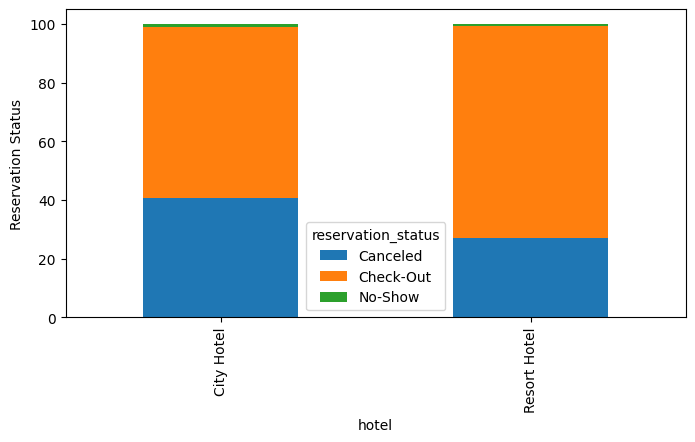

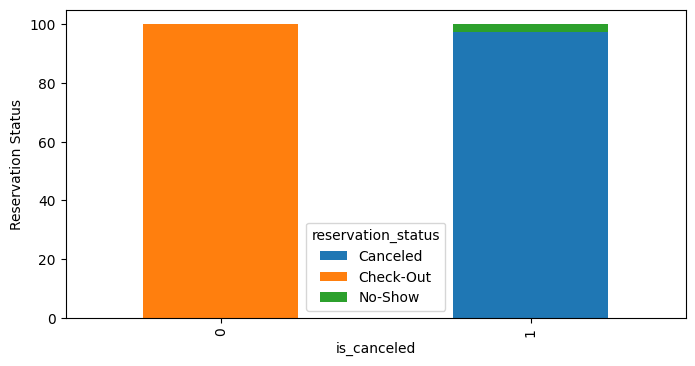

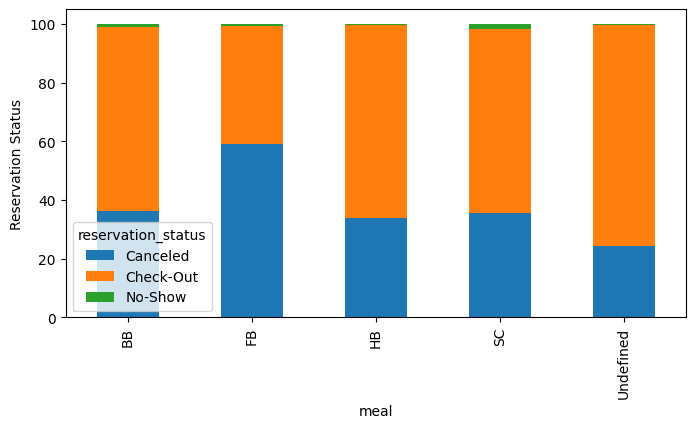

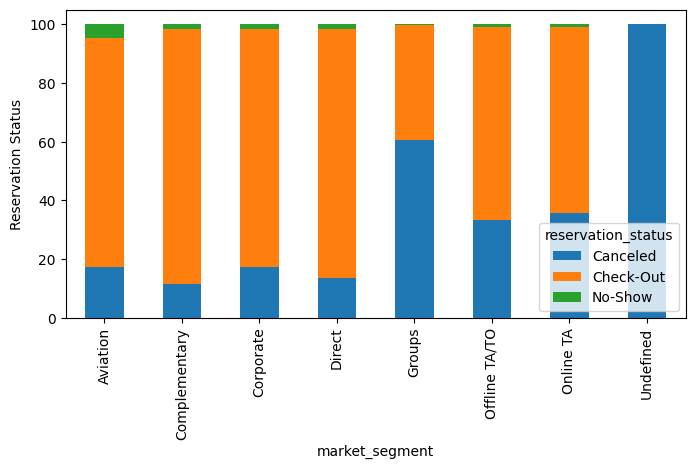

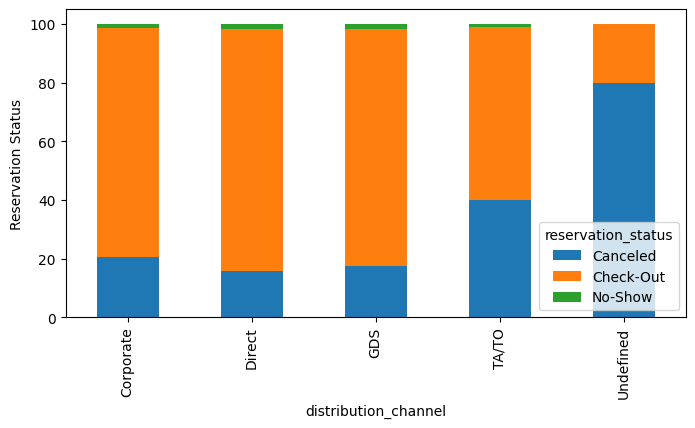

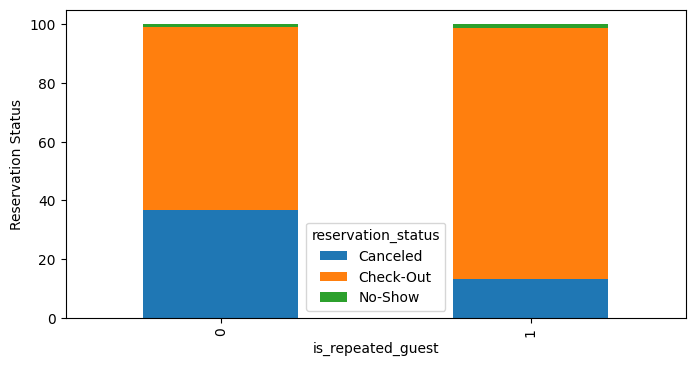

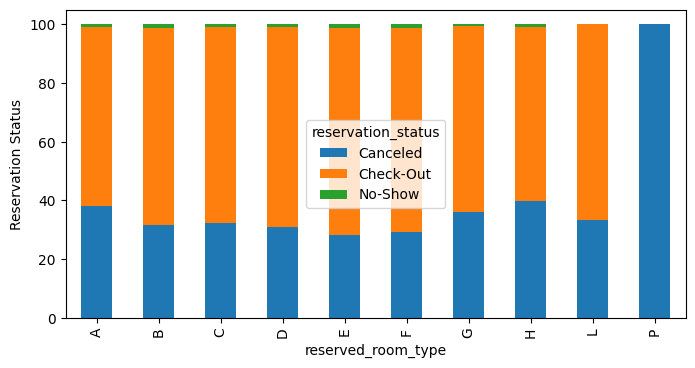

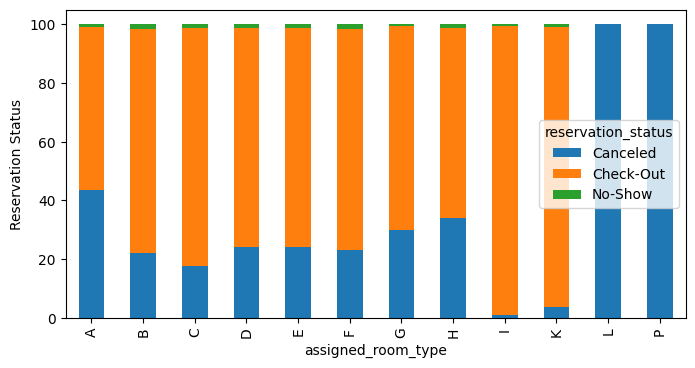

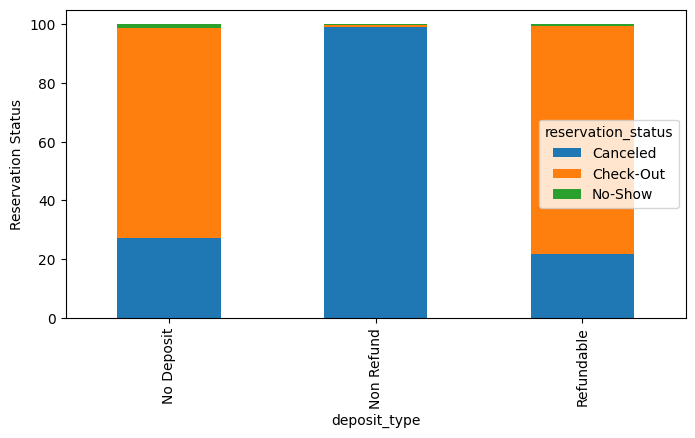

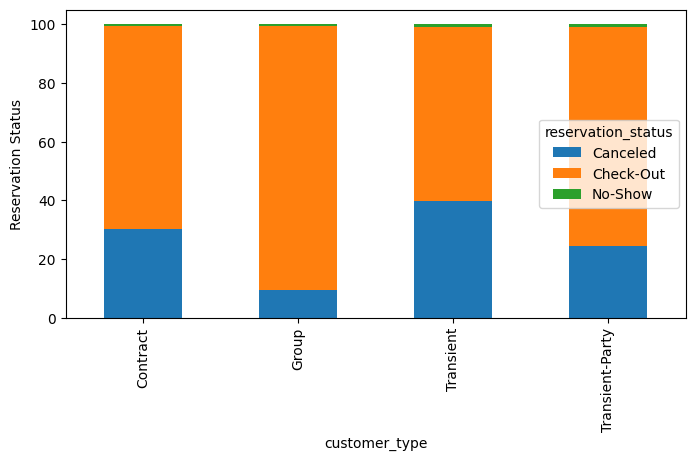

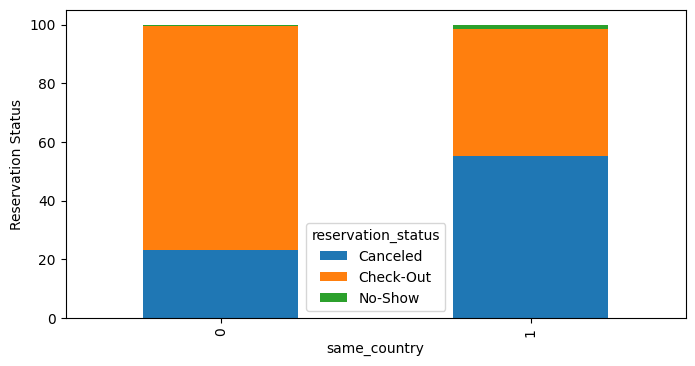

In [15]:
for i in categorical_column_list:
  if df[i].nunique() < 15:
    if i != 'reservation_status':
       (pd.crosstab(df[i], df['reservation_status'], normalize='index')*100).plot(kind='bar',figsize=(8,4), stacked=True)
       plt.ylabel('Reservation Status')

**Observations**:

- 37% of reservations are canceled, this includes cancelations and no shows.  No shows are only 1% of all reservations.
- 66.4% of reservations are for city hotels.
- 77.3% are for a Bed and Breakfast meal plan.  Only 1% of reservations have no meal plan.  Reservations with full board meal plans (breakfast, lunch, and dinner) may have higher cancelation rates.
- The majority of reservations are through travel agents and tour operators (82%).  Reservations that are under the undefined or group market_segements may have higher cancelation rates.
- The majority of reservations (87.6%) are made with no deposits.  Customers who reserve with non-refundable deposits appear to have higher cancelation rates.
- Only 3.2% of guests are repeat customers and have a lower cancelation rate.
- The majority of reservations are for transient individuals or groups, 75.1% and 21.0% respectively. These are groups that are not booked under a contract or group rate.  The transient reservations appear to have higher cancelation rates.

In addition the following may also have higher cancelation rates:
- Under undefined or group market_segment.
- Undefined or TA/TO distribution channel
- P reserved room type
- Reservations from the same country

## Exploration of time to cancel

Observations:
- Date columns may be reviewed to extract the time difference between how soon or late reservations were canceled.

In [16]:
# Reviewing the reservation status dates
print(df["reservation_status_date"].value_counts())

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64


In [17]:
# Convert reservation status date to datetime using pd.to_datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

Creating a new feature for arrival date

In [18]:
 # Update month column to string
 df['arrival_date_month'] = df['arrival_date_month'].astype(str)

In [19]:
# Create dictionary to replace string with month number
cal_month_dictionary = {'January': '1', 'February': '2', 'March': '3', 'April': '4', 'May': '5', 'June': '6', 'July': '7', "August": '8', "September": '9',
                        'October': '10', 'November': '11', 'December': '12'}

df['arrival_date_month'] = df['arrival_date_month'].replace(cal_month_dictionary)


In [20]:
# Convert object column to integer
df['arrival_date_month'] = df['arrival_date_month'].astype(int)

In [21]:
# Calculate arrival date to datetime
df['arrival_date'] = pd.to_datetime(dict(year=df.arrival_date_year, month=df.arrival_date_month, day=df.arrival_date_day_of_month))

In [22]:
# Calculate date of reservation
df['reservation_date'] = df['arrival_date'] - pd.to_timedelta(df['lead_time'], unit='D')

In [23]:
# Calculate date of cancelation
df['days_from_reservation_to_cancel'] = df['reservation_status_date'] - df['reservation_date']

# Add to column list
numerical_column_list.append('days_from_reservation_to_cancel')

In [24]:
# Convert output so that only number of days is saved
df['days_from_reservation_to_cancel'] = df['days_from_reservation_to_cancel'].dt.days

In [25]:
# Replace column with 0 days if the reservation does not have a canceled or no show status
df.loc[df.is_canceled == 0, 'days_from_reservation_to_cancel'] = None

# Confirm operation
df['days_from_reservation_to_cancel'].isnull().sum() == (df['is_canceled'] == 0).sum()

True

In [26]:
# Create variable to review distribution of how many days before a cancel
frequency_days_to_cancel = df['days_from_reservation_to_cancel'].value_counts(normalize=True).sort_index(ascending=True)

print(frequency_days_to_cancel.head(5))

0.0    0.162129
1.0    0.050267
2.0    0.031928
3.0    0.026411
4.0    0.019718
Name: days_from_reservation_to_cancel, dtype: float64


In [27]:
# View cummulative results
frequency_days_to_cancel.cumsum(axis = 0, skipna=True).head(5)

0.0    0.162129
1.0    0.212396
2.0    0.244324
3.0    0.270735
4.0    0.290453
Name: days_from_reservation_to_cancel, dtype: float64

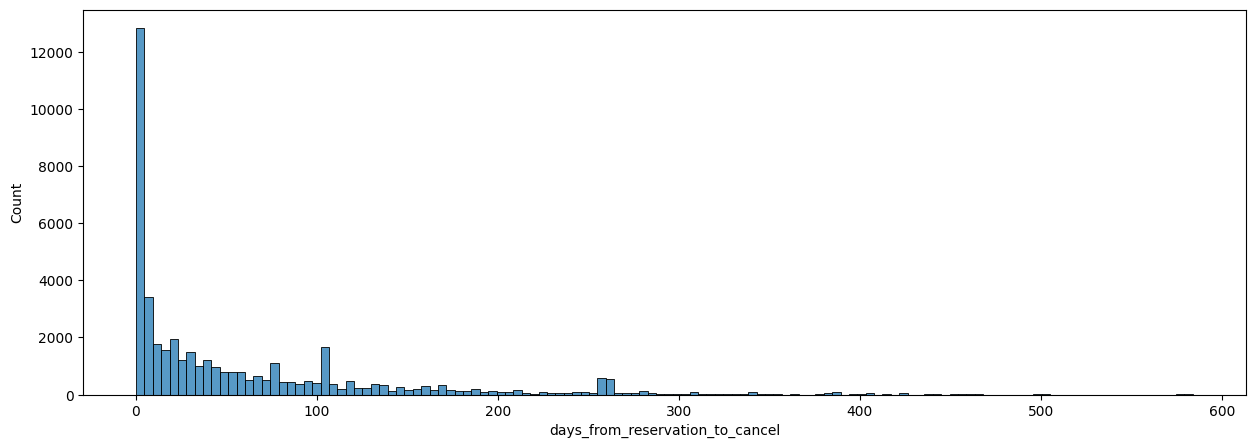

In [28]:
# Plot distribution
plt.figure(figsize=(15,5))
ax = sns.histplot(df, x='days_from_reservation_to_cancel')
plt.show()

## Visualization for trends in reservations based month




In [34]:
df['arrival_date'].info

<bound method Series.info of 0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119390, dtype: datetime64[ns]>

<function matplotlib.pyplot.show(close=None, block=None)>

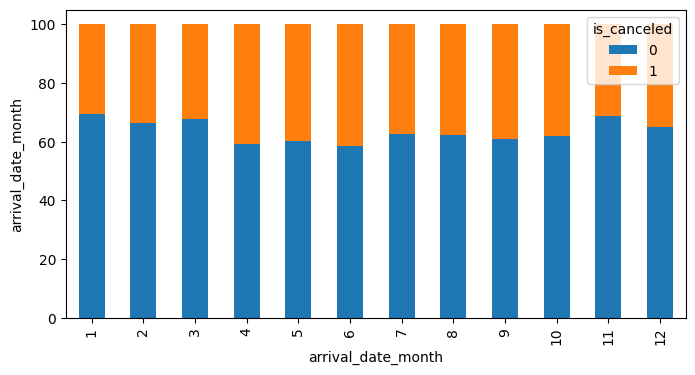

In [72]:
# Month visualization
(pd.crosstab(df['arrival_date_month'], df['is_canceled'], normalize='index')*100).plot(kind='bar',figsize=(8,4), stacked=True)
plt.ylabel('arrival_date_month')
plt.show

**Observations**:

- Does not appear to be an impact to cancel rate based on month

In [73]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'same_country',
       'arrival_date', 'reservation_date', 'days_from_reservation_to_cancel'],
      dtype='object')

## Exploration of numerical columns

In [29]:
df[numerical_column_list].describe().round(2)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,days_from_reservation_to_cancel
count,119390.00,119390.00,119390.00,119390.00,119386.0,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,44224.00
mean,104.01,0.93,2.50,1.86,0.1,0.01,0.09,0.14,0.22,2.32,101.83,0.06,0.57,58.97
std,106.86,1.00,1.91,0.58,0.4,0.10,0.84,1.50,0.65,17.59,50.54,0.25,0.79,81.84
min,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,-6.38,0.00,0.00,0.00
25%,18.00,0.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,69.29,0.00,0.00,3.00
50%,69.00,1.00,2.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,94.58,0.00,0.00,26.00
75%,160.00,2.00,3.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,126.00,0.00,1.00,85.00
max,737.00,19.00,50.00,55.00,10.0,10.00,26.00,72.00,21.00,391.00,5400.00,8.00,5.00,584.00


**Obeservations**:

- The average of all reservations are placed 104 days in advance.  This is roughly over 3 months, about 15 weeks.
- Stays average 1 weekend night & 2.5 week nights.
- Stays average about 2 adults and no children or babies.


In [30]:
# View count of unique numbers in numerical list.
for i in numerical_column_list:
  print(i, df[i].nunique())

lead_time 479
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 5
babies 5
previous_cancellations 15
previous_bookings_not_canceled 73
booking_changes 21
days_in_waiting_list 128
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6
days_from_reservation_to_cancel 377


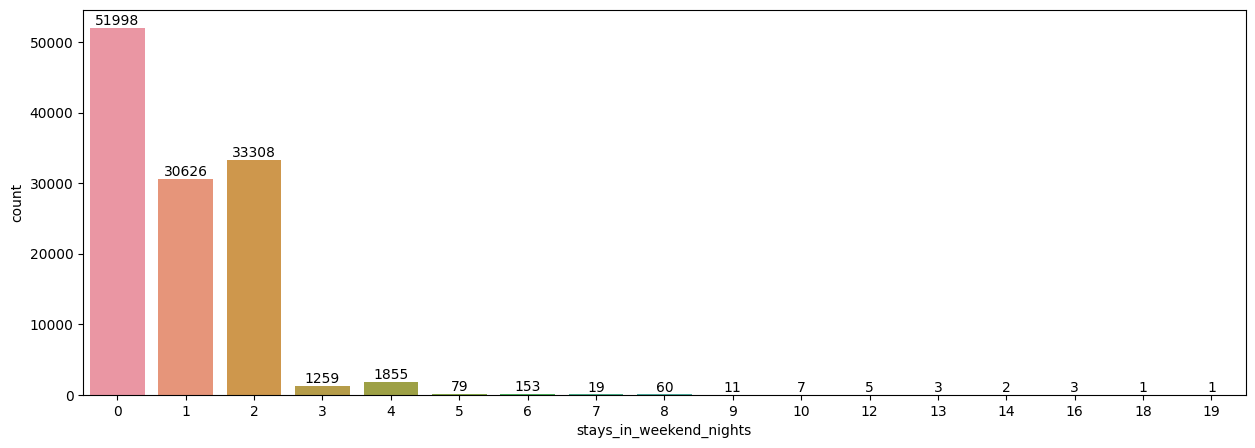

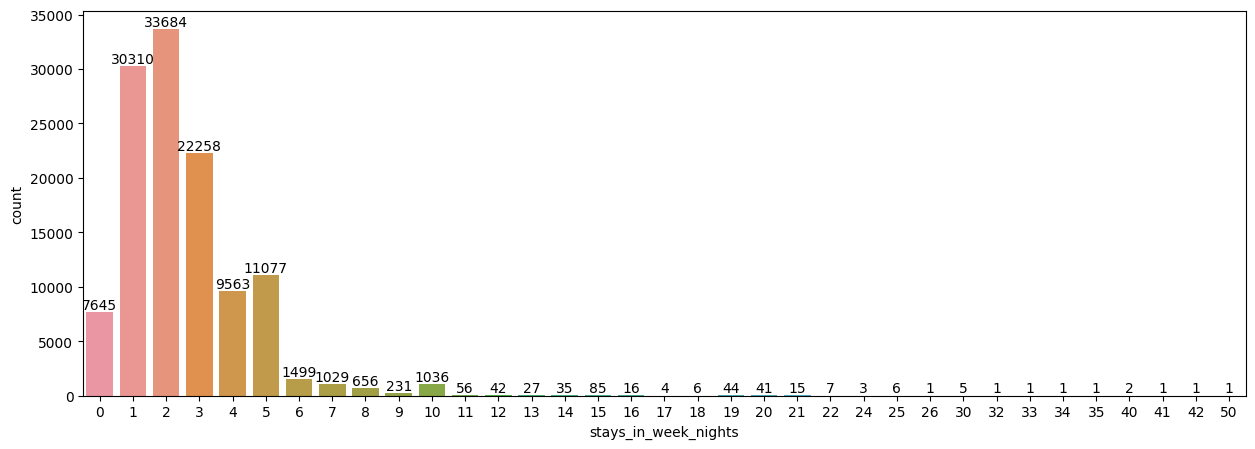

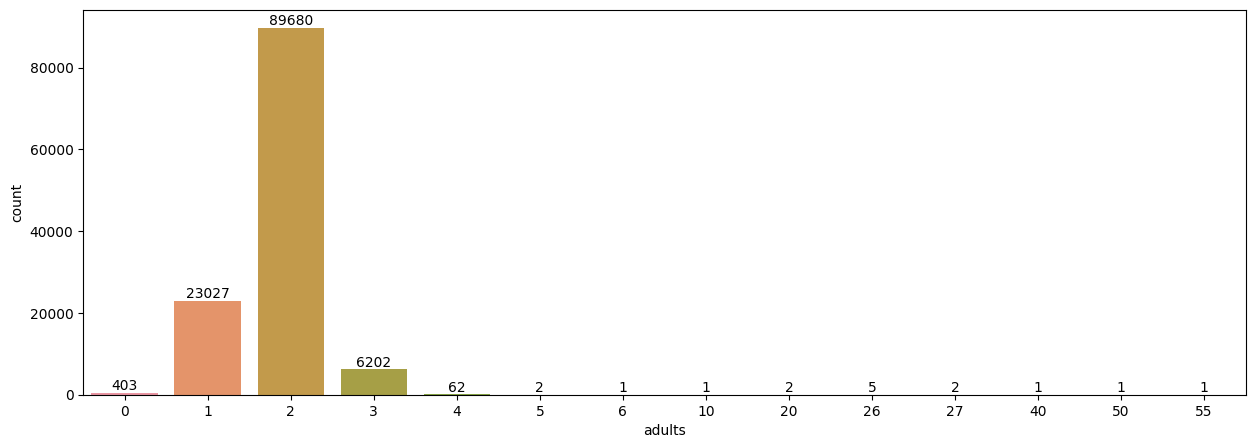

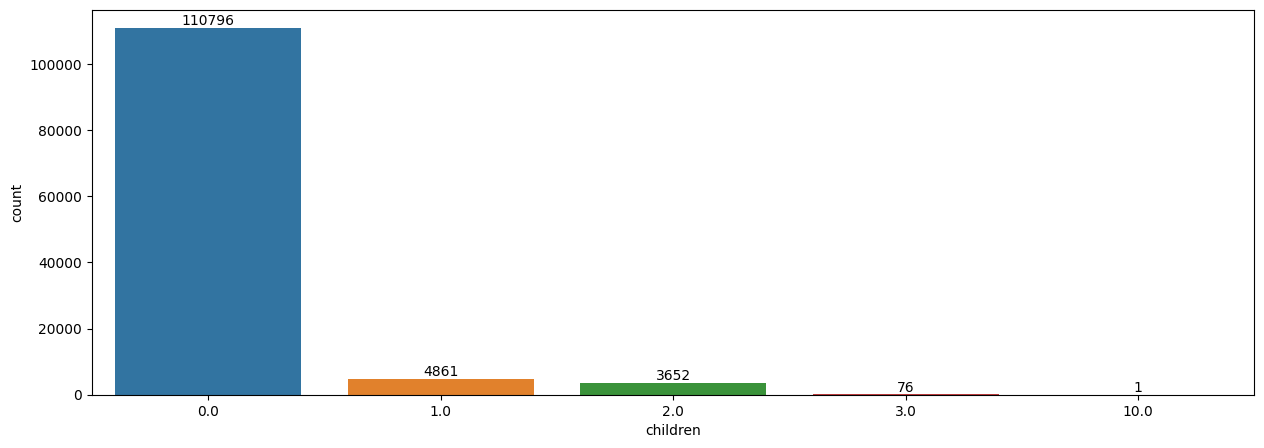

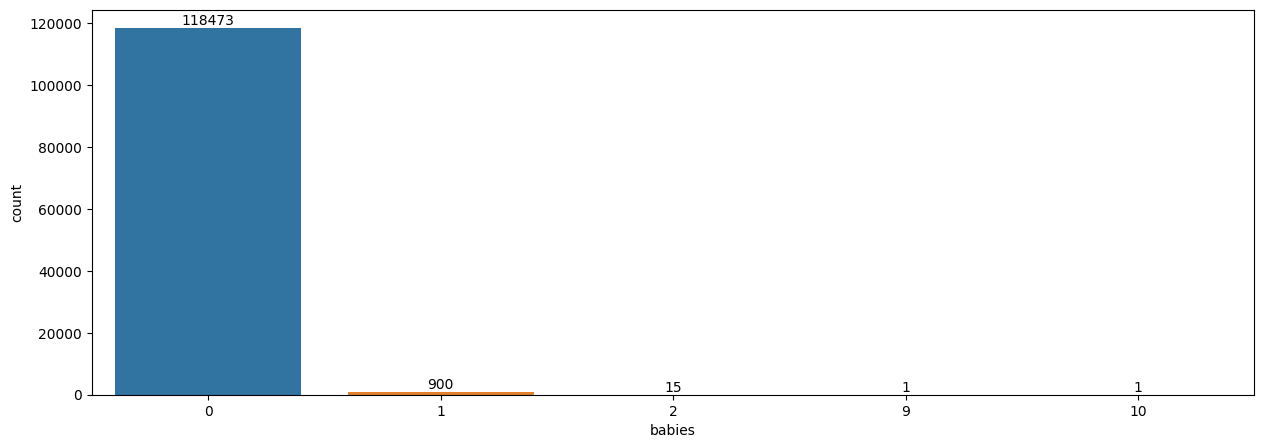

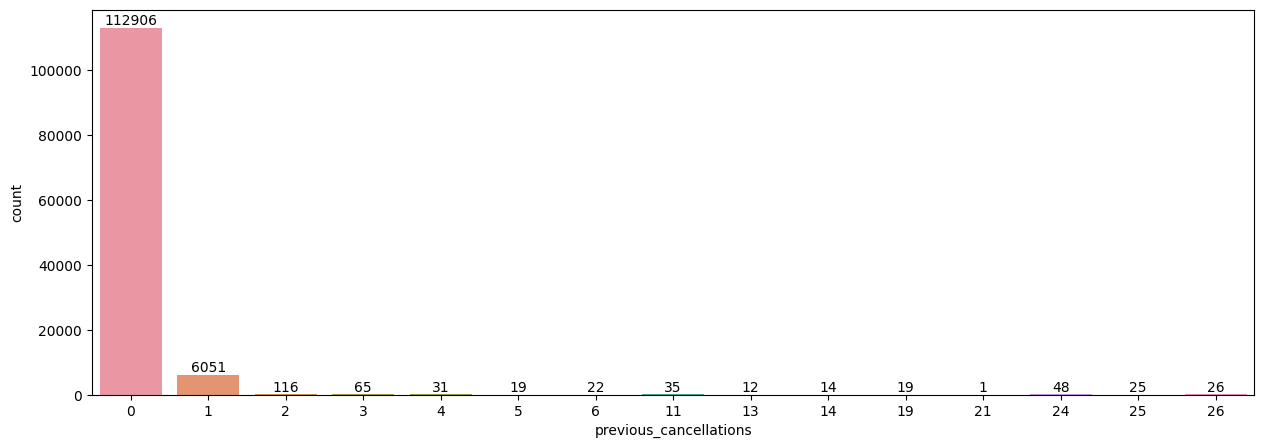

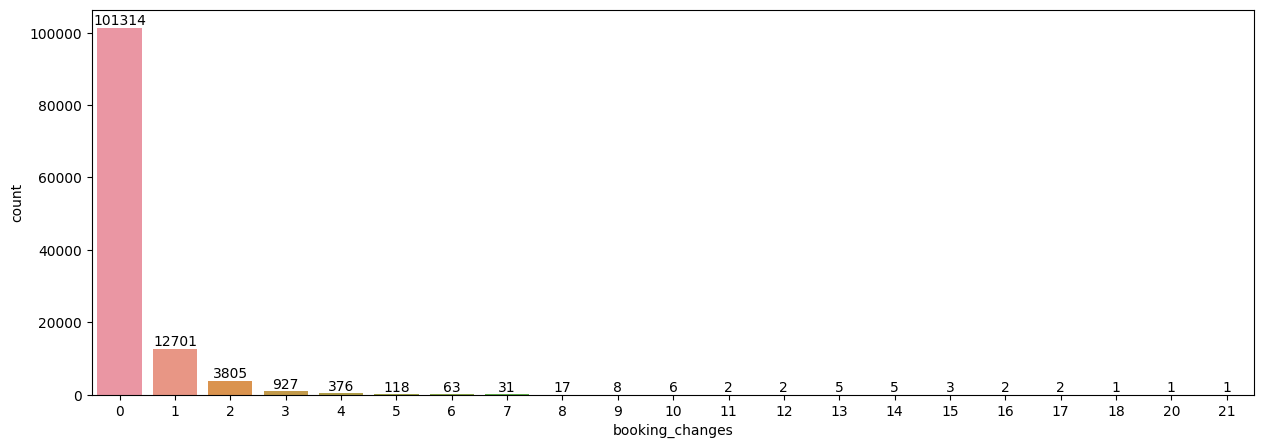

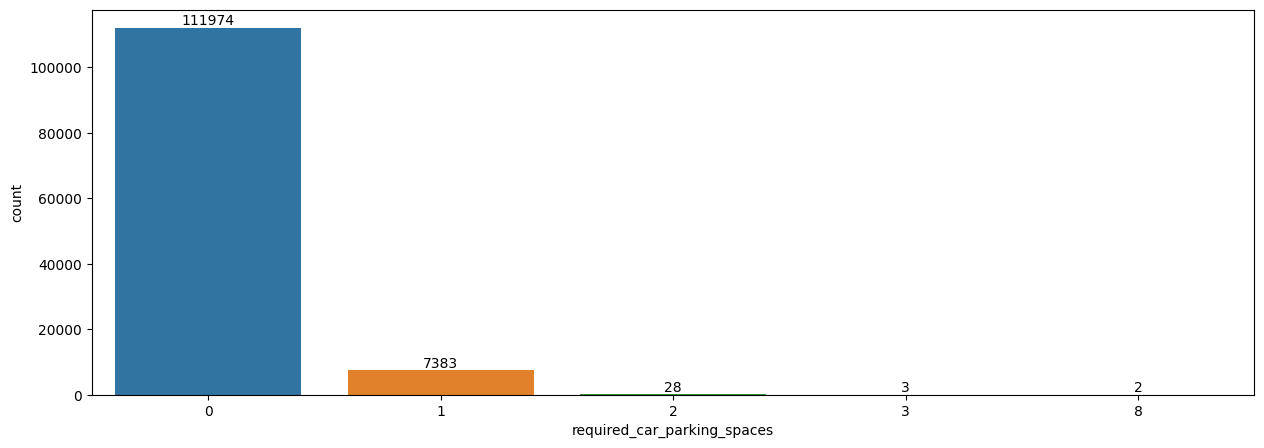

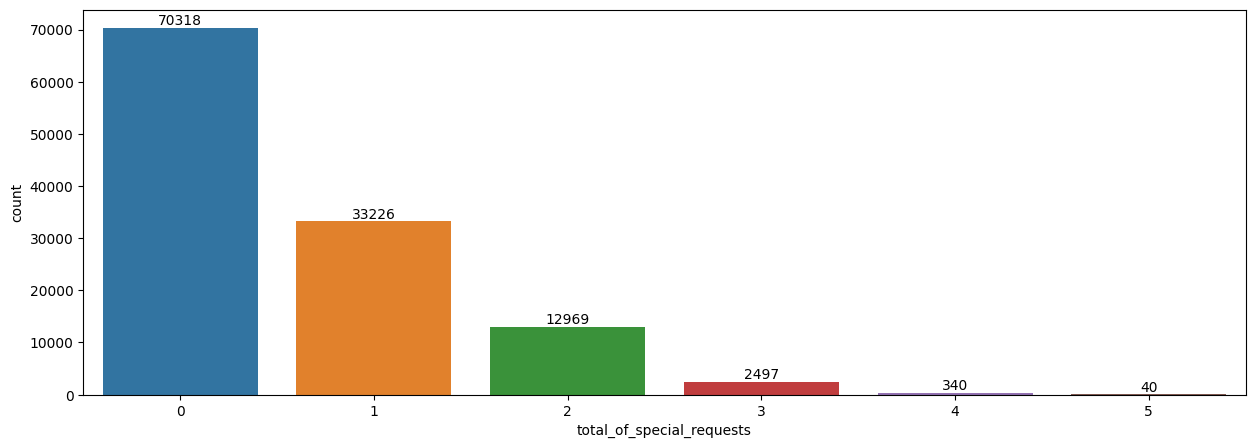

In [31]:
# Review distribution of numerical columns

for i in numerical_column_list:
  if df[i].nunique()<36:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(df, x=i)
    for label in ax.containers:
      ax.bar_label(label)
    print('\n')
  plt.show()

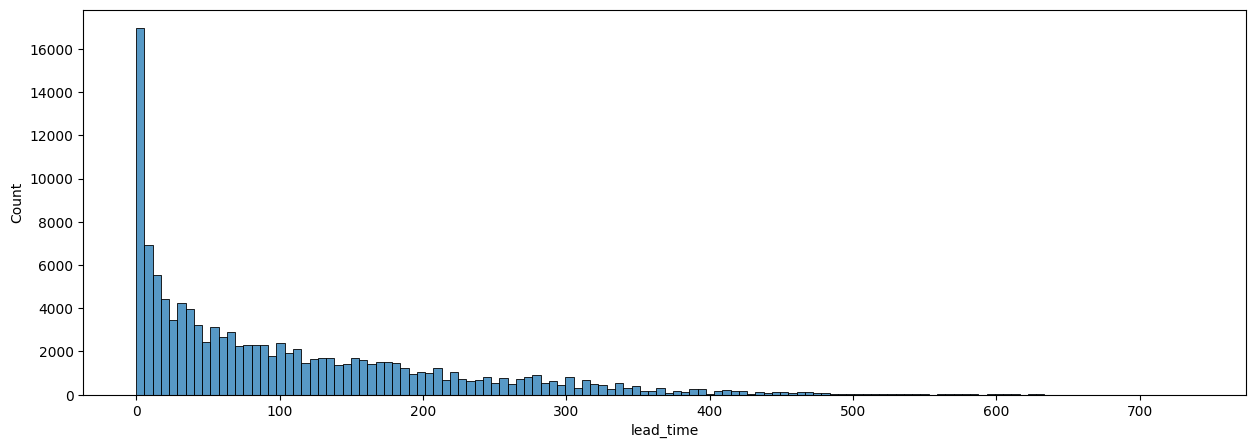

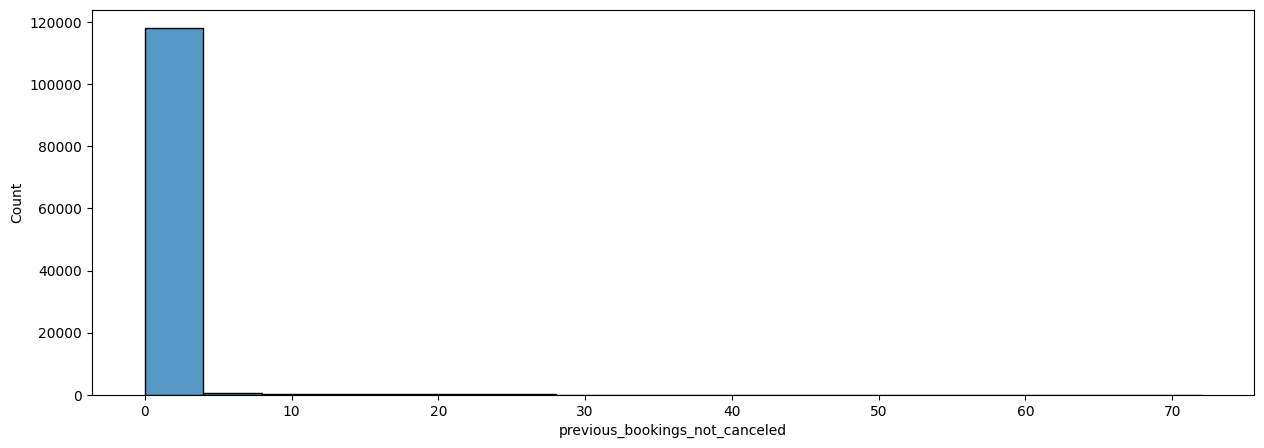

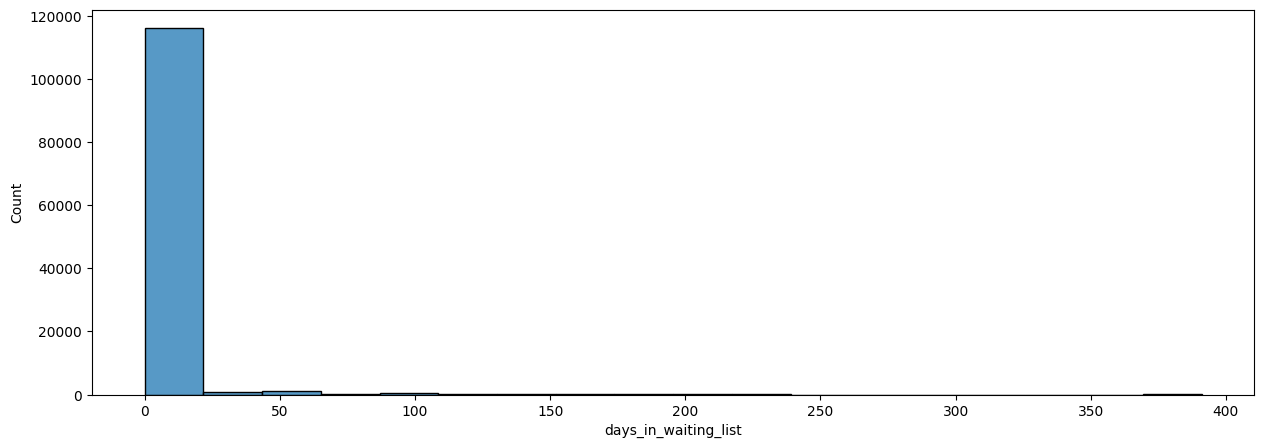

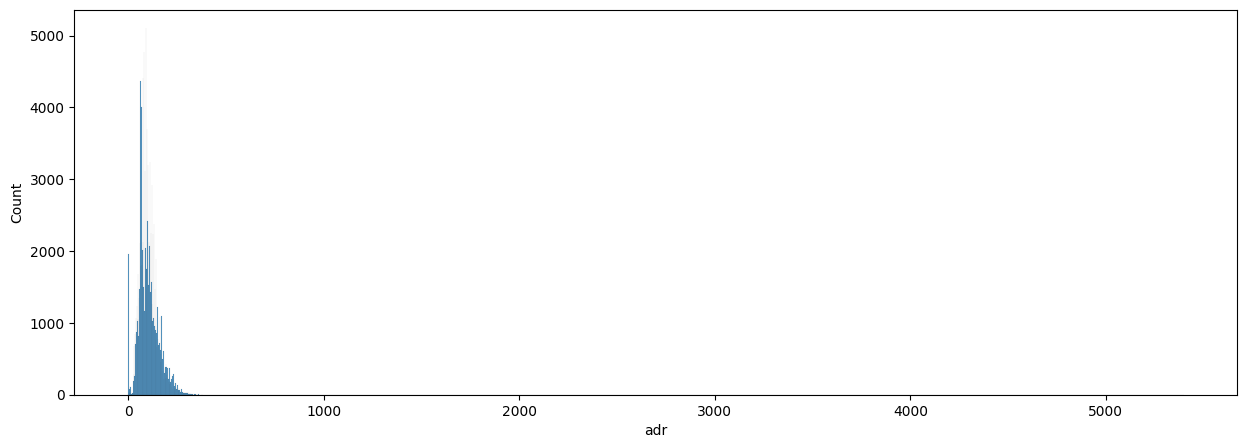

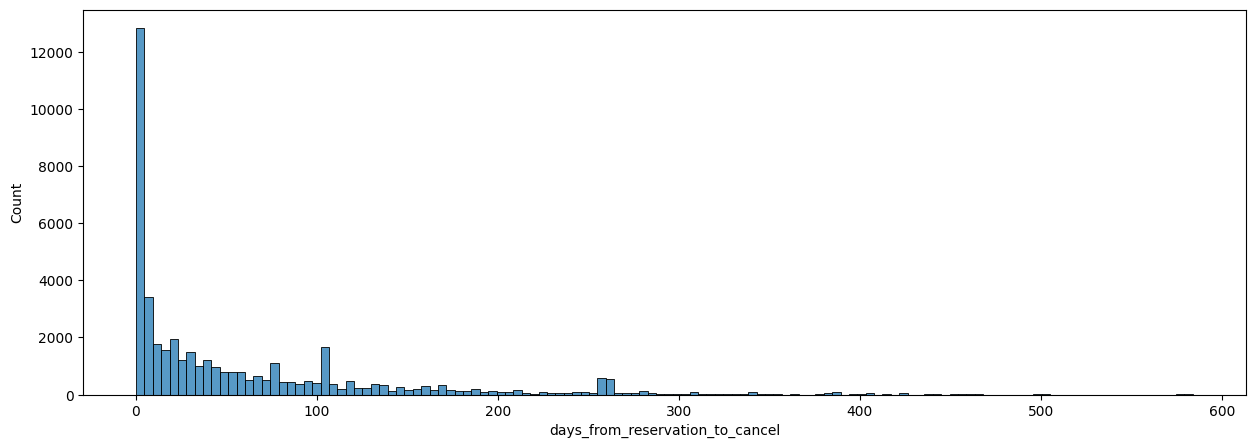

In [32]:
for i in numerical_column_list:
  if df[i].nunique()>=36:
    plt.figure(figsize=(15,5))
    ax = sns.histplot(df, x=i)
    print('\n')
  plt.show()

**Observations**:

- Appear to have outliers in many of the numerical columns.  Most are skewed to the left due to these outliers.  May need to consider log transforming these variables.

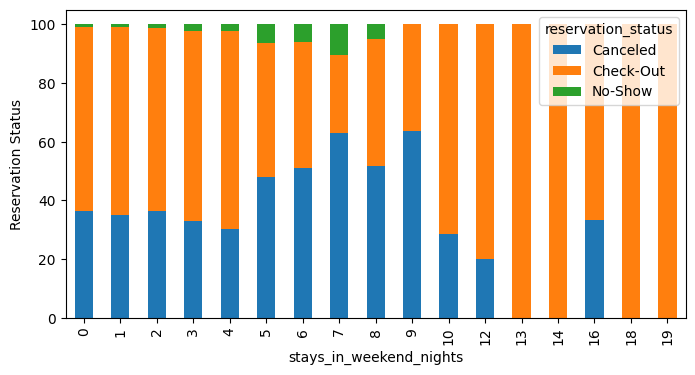

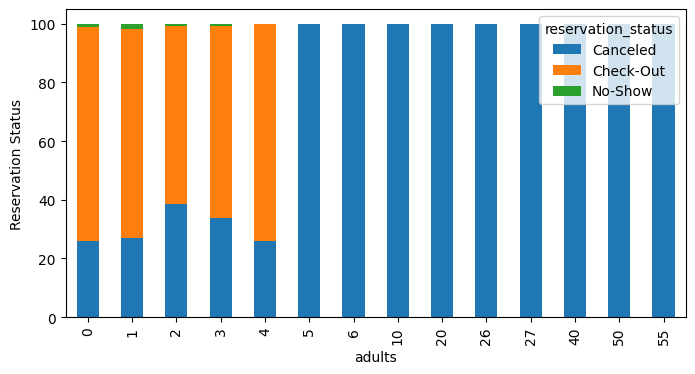

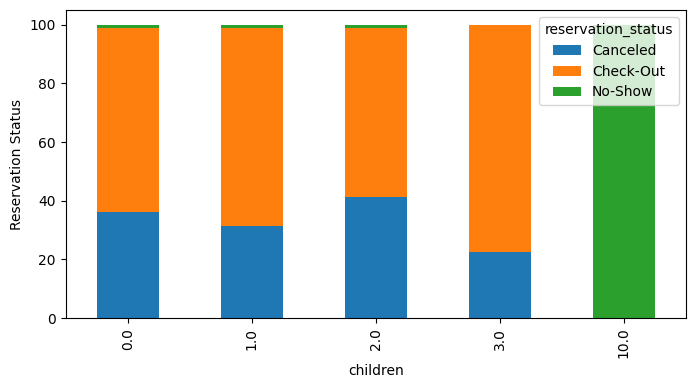

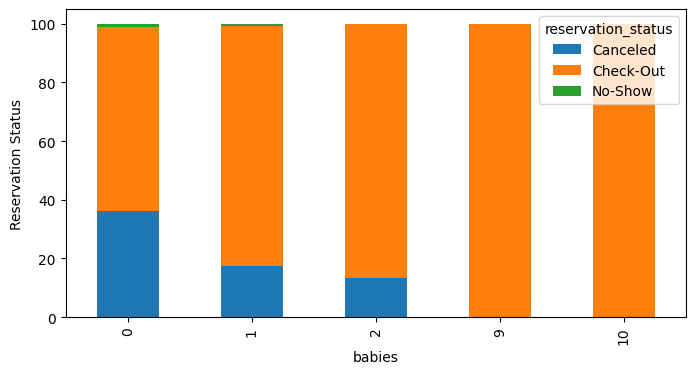

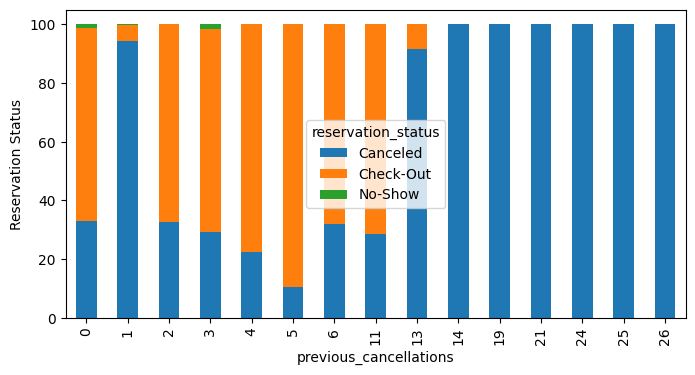

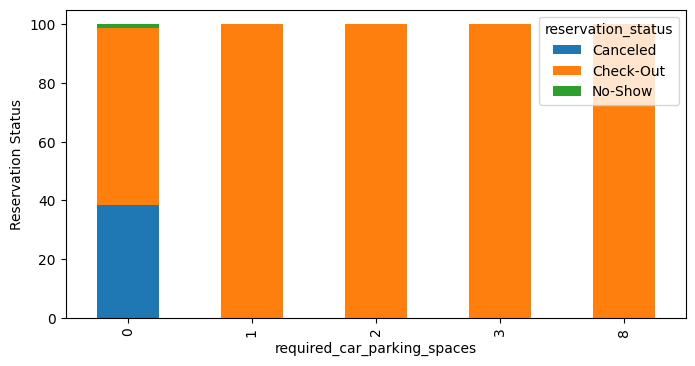

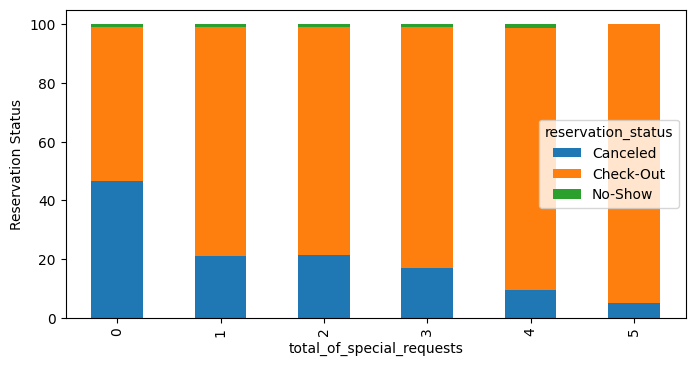

In [33]:
for i in numerical_column_list:
  if df[i].nunique() < 20:
    if i != 'reservation_status':
       (pd.crosstab(df[i], df['reservation_status'], normalize='index')*100).plot(kind='bar',figsize=(8,4), stacked=True)
       plt.ylabel('Reservation Status')

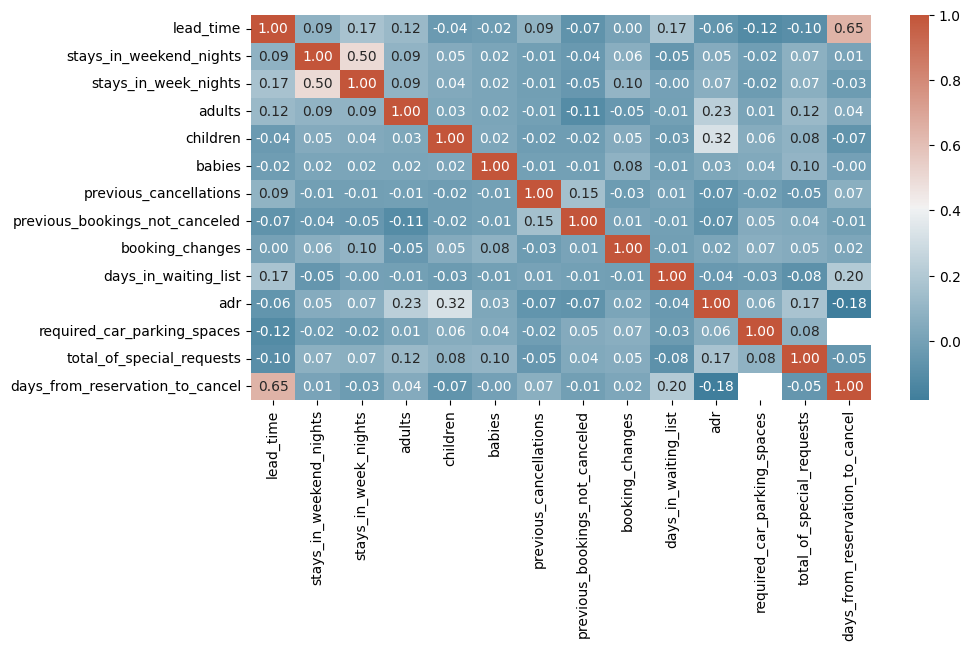

In [34]:
# Review variables for colliniarity
plt.figure(figsize=(10,5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[numerical_column_list].corr(), annot=True, fmt='.2f', cmap=cmap)
plt.show()

**Observation**:
 - Number of weekend and weekday nights show medium correlation.
 - Lead_time and days_from_reservation_to_cancel show higher correlation.  Will remove from dataset.

In [35]:
# Remove days_from_reservation_to_cancel from dataset

numerical_column_list.pop(-1)

'days_from_reservation_to_cancel'

# Classification

## Preparation for classification

In [36]:
# Drop 4 rows where there are nulls in the children column
df.dropna(subset=['children'], inplace = True)

In [53]:
# Preparation of X & y

X = df[['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations','previous_bookings_not_canceled',
        'reserved_room_type', 'booking_changes', 'deposit_type', 'customer_type', 'adr','required_car_parking_spaces',
        'total_of_special_requests', 'same_country']]

y = df['is_canceled']


Columns included if they are known prior to a cancelation.

## Assigning Dummy Values

In [54]:
# Create a list to iterate through when creating dummy values
dummycollist = []

# Loop to select all the columns in the dataframe that are an "object" datatype
for i in X.columns:
  if X[i].dtypes == "object":
    dummycollist.append(i)

# Get dummies
X = pd.get_dummies(data = X, columns = dummycollist, drop_first=True)

X_columns = X.columns

## Train Test Split

In [40]:
# Split data for training & testing
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=SEED)

## Scaling

In [41]:
# Instantiate Scaler
scaler = StandardScaler()

# Scale training and test X
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Classification Model

In [59]:
from sklearn.neighbors import KNeighborsClassifier as KNN

# Instantiate Classifier
knn = KNN()

In [60]:
# Fit training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [62]:
# Save training preditions
y_training_pred = knn.predict(X_train_scaled)

In [63]:
# Predict using test data
y_pred = knn.predict(X_test_scaled)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_training_pred, y_train))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     54622
           1       0.81      0.87      0.84     28948

    accuracy                           0.89     83570
   macro avg       0.87      0.88      0.88     83570
weighted avg       0.89      0.89      0.89     83570



In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     22488
           1       0.80      0.75      0.77     13328

    accuracy                           0.84     35816
   macro avg       0.83      0.82      0.82     35816
weighted avg       0.84      0.84      0.84     35816



**Observations**:

- Training accuracy at 89%
- Testing accuracy at 84%

Model identifies reservation cancelation with 80% precision and 75% recall.

# Conclusion